In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = {"Lady in the Water":np.array([2.5, 3.0, 2.5, 'nan', 3, 3, 'nan'], dtype=np.double), "Snakes on a Plane": np.array([3.5, 3.5, 3.0, 3.5, 4, 4, 4.5], dtype=np.double),
        "Just my Luck": np.array([3.0,1.5,'nan',3,2,'nan','nan'], dtype=np.double),  "Superman Returns": np.array([3.5,5,3.5,4.0,3,5,4], dtype=np.double), 
        "The Night Listener": np.array([3,3,4,4.5,3,3,'nan'], dtype=np.double), "You, Me and Dupree":np.array([2.5,3.5,'nan',2.5,2.0,3.5,1], dtype=np.double)}
users = ["Lisa", "Gene", "Mike", "Jane", "Mick", "Jill", "Toby"]
films = ["Lady in the Water", "Snakes on a Plane","Just my Luck","Superman Returns","The Night Listener","You, Me and Dupree"]
film_labels = ["Lady", "Snakes", "Luck", "Superman", "Night", "Dupree"]
film_dict = dict(zip(films, film_labels))
df = pd.DataFrame(data, index = users)
df


,Lady in the Water,Snakes on a Plane,Just my Luck,Superman Returns,The Night Listener,"You, Me and Dupree"
Lisa,2.5,3.5,3.0,3.5,3.0,2.5
Gene,3.0,3.5,1.5,5.0,3.0,3.5
Mike,2.5,3.0,NaN,3.5,4.0,NaN
Jane,NaN,3.5,3.0,4.0,4.5,2.5
Mick,3.0,4.0,2.0,3.0,3.0,2.0
Jill,3.0,4.0,NaN,5.0,3.0,3.5
Toby,NaN,4.5,NaN,4.0,NaN,1.0


In [2]:
#routine to plot sparse vector points. iterates through vector, if either one or the other are NaN, then does not plot that point. 
%matplotlib inline
def make_mask(x,y, labels):
    plot_point=[]
    for i in range(len(x)):
        if (np.isnan(x[i]) or np.isnan(y[i])):
            continue
        else:
            plot_point.append(labels[i])
    return plot_point



# Visualisation of users in film space

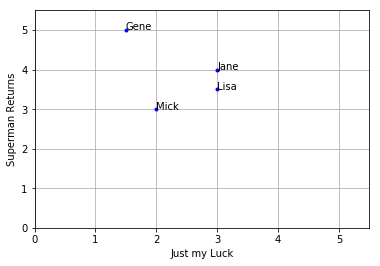

In [3]:
x = "Just my Luck"
y = "Superman Returns"
plot_mask = make_mask(df[x],df[y], users )
x_vals = df[x].loc[plot_mask]
y_vals = df[y].loc[plot_mask]
fig, ax = plt.subplots()
ax.plot(x_vals,y_vals, 'b.')
plt.grid()
plt.axis([0,5.5,0,5.5])
plt.xlabel(x)
plt.ylabel(y)
for user in plot_mask:
    ax.annotate(user, (x_vals[user], y_vals[user]))

# Plotting correlations between users using pearson similarity

In [4]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')
    
def pearson(x, y):
    x_bar =  np.mean(x)
    y_bar = np.mean(y)
    top = np.dot( (x-x_bar), (y-y_bar) )
    bottom = np.sqrt( sum((x - x_bar)**2) * sum((y - y_bar)**2) )
    return top/bottom

Pearson Correlation =  0.8934051474415644


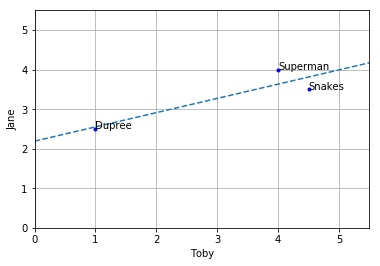

In [5]:
x = "Toby"
y = "Jane"
film_mask = make_mask(df.loc[x], df.loc[y], films)
x_vals = df[film_mask].loc[x]
y_vals = df[film_mask].loc[y]
fig, ax = plt.subplots()
ax.plot(x_vals,y_vals, 'b.')
plt.grid()
plt.axis([0,5.5,0,5.5])
plt.xlabel(x)
plt.ylabel(y)
for film in film_mask:
    ax.annotate(film_dict[film], (x_vals[film], y_vals[film]))
p = pearson(x_vals, y_vals)
print("Pearson Correlation = ", p)
coeff = np.polyfit(x_vals,y_vals,1)
abline(coeff[0], coeff[1])

# Ranking users by similarity

In [6]:
import numpy.linalg as la
def euclid_dist(x, y):
    tot = 0
    for i in range(len(x)):
        diff = (x[i] - y[i])**2
        tot +=diff
    return np.sqrt(tot)

def euclid_sim(x,y):
    dist = euclid_dist(x,y)
    return 1/(1+dist)

def cos_sim(x,y):
    sim = np.dot(x,y)/(np.sqrt(sum(x**2))*np.sqrt(sum(y**2)))
    return sim

def rank(user1, df, sim=pearson, n = None, print_out=True):
    users = list(df.index)
    if not n:
        n = len(users)-1
    us = users.copy()
    us.remove(user1)
    similarities=[]
    fs = list(df.columns)
    
    for user2 in us:
        film_mask = make_mask(df.loc[user1], df.loc[user2], fs)
        x_vals = df[film_mask].loc[user1]
        y_vals = df[film_mask].loc[user2]
        s = sim(x_vals, y_vals)
        similarities.append(s)
        
    sim_dict = dict(zip(us, similarities))
    top_match = []
    if print_out:
        print("Top %d closest to %s \n" % (n, user1))
    for key, value in sorted(sim_dict.items(), key=lambda item: (item[1], item[0]), reverse=True):
        top_match.append(((key), value))
        if print_out:
            print(key, value)
    if print_out:
        print("\n")
    return top_match


In [7]:
u1 = "Lisa"
print("Using cosine similarity metric \n")
top_matches = rank(u1, df, sim=cos_sim) 

print("Using Pearson similarity metric \n")
top_matches = rank(u1,  df)  

Using cosine similarity metric 

Top 6 closest to Lisa 

Jill 0.9912758269345802
Jane 0.986586764527925
Mike 0.9859858031677182
Mick 0.9818313856641693
Gene 0.9606463013980241
Toby 0.9528927449621697


Using Pearson similarity metric 

Top 6 closest to Lisa 

Toby 0.9912407071619304
Jill 0.747017880833996
Mick 0.5940885257860046
Jane 0.5669467095138409
Mike 0.40451991747794525
Gene 0.39605901719066977




# Item - Item Similarity

In [8]:
rank("Superman Returns", df.T)

Top 5 closest to Superman Returns 

You, Me and Dupree 0.657951694959769
Lady in the Water 0.48795003647426655
Snakes on a Plane 0.1118033988749895
The Night Listener -0.1798471947990542
Just my Luck -0.42289003161103106




[('You, Me and Dupree', 0.657951694959769),
 ('Lady in the Water', 0.48795003647426655),
 ('Snakes on a Plane', 0.1118033988749895),
 ('The Night Listener', -0.1798471947990542),
 ('Just my Luck', -0.42289003161103106)]

# Precomputing Item Similarity

In [9]:
def calc_similar_items(df, similarity=pearson, n = 2):
    t_df = df.T
    items = list(t_df.index)
    ret={}
    for item in items:
        r = rank(item, t_df, sim=similarity, print_out=False)
        ret[item] = r[:n]
    return ret

In [10]:
calc_similar_items(df)

{'Lady in the Water': [('Snakes on a Plane', 0.7637626158259732),
  ('Superman Returns', 0.48795003647426655)],
 'Snakes on a Plane': [('Lady in the Water', 0.7637626158259732),
  ('Superman Returns', 0.1118033988749895)],
 'Just my Luck': [('The Night Listener', 0.5555555555555556),
  ('Snakes on a Plane', -0.3333333333333333)],
 'Superman Returns': [('You, Me and Dupree', 0.657951694959769),
  ('Lady in the Water', 0.48795003647426655)],
 'The Night Listener': [('Just my Luck', 0.5555555555555556),
  ('Superman Returns', -0.1798471947990542)],
 'You, Me and Dupree': [('Superman Returns', 0.657951694959769),
  ('Lady in the Water', 0.3333333333333333)]}

# Item - based recommendation

In [11]:
def get_recommended_items(user, df, similarity = pearson, limit=6):
    films = df.columns
    sim_dict = calc_similar_items(df, similarity=similarity, n=6)
    rate_dict={}
    for film in df.columns:
        if np.isnan(df[film].loc[user]):
            sim_sum = 0
            rate_sim_sum = 0
            for sim_film in sim_dict[film]:
                if not np.isnan(df[sim_film[0]].loc[user]):
                    sim = sim_film[1]
                    rate = df[sim_film[0]].loc[user]
                    rate_sim_sum += sim*rate
                    sim_sum += sim
            est_rating = rate_sim_sum/sim_sum
            rate_dict[est_rating] = film
    rates = list(rate_dict.keys())
    if limit>len(rates):
        limit=len(rates)
    rates.sort(reverse=True)
    rates = rates[:limit]
    for rate in rates:
        print(rate_dict[rate], "%0.2f" %rate)



In [12]:
get_recommended_items("Toby", df, similarity=euclid_sim) 

The Night Listener 3.17
Just my Luck 2.94
Lady in the Water 2.87


In [13]:
get_recommended_items("Toby", df, similarity=pearson) 

Lady in the Water 3.61
The Night Listener 3.53
Just my Luck 2.96


In [14]:
get_recommended_items("Toby", df, similarity=cos_sim) 

Just my Luck 3.19
The Night Listener 3.18
Lady in the Water 3.18


In [15]:
def rating(user, item, df, similarity_metric=pearson):
    users = list(df.index)
    top_matches = rank(user, df, sim=similarity_metric, print_out=False)
    weight_sum = 0
    sim_tot=0
    for user2, similarity in top_matches:
        if similarity < 0:
            continue
        if np.isnan(df[item].loc[user2]):
            continue
        weight_sum += similarity * df[item].loc[user2]
        sim_tot += np.abs(similarity)
    return weight_sum/sim_tot

def get_recommendation(user, df, limit=3):
    films = df.columns
    rate_dict = {}
    for film in df.columns:
        if np.isnan(df[film].loc[user]):
            rate = rating(user, film, df)
            rate_dict[rate] = film
    rates = list(rate_dict.keys())
    if limit>len(rates):
        limit=len(rates)
    rates.sort(reverse=True)
    rates = rates[:limit]
    for rate in rates:
        print(rate_dict[rate], "%0.2f" %rate)

In [17]:
get_recommendation("Toby", df)

The Night Listener 3.35
Lady in the Water 2.83
Just my Luck 2.53
